In [54]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [55]:
df = pd.read_csv('Data for Python-kopi.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])
df = df.iloc[1:, :]


In [64]:
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,,,,,,,,,,,,
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,1.0,0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,NaN,...,0.0,6.0,0.0,0.0,0.0,NaN,0.0,8,1.0,1
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,NaN,...,0.0,6.0,0.0,0.0,0.0,NaN,0.0,9,1.0,1
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,NaN,...,0.0,6.0,1.0,0.0,1.0,NaN,0.0,9,1.0,1
H,6,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,NaN,...,0.0,2.0,0.0,2.0,0.0,NaN,0.0,13,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,NaN,...,0.0,2.0,0.0,0.0,0.0,NaN,0.0,3,1.0,0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,NaN,...,0.0,2.0,0.0,0.0,0.0,NaN,0.0,4,3.0,0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,NaN,...,0.0,6.0,0.0,0.0,0.0,NaN,0.0,12,2.0,1


In [56]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 0
    else:
        return 1

In [57]:

Output = df.apply(pin_update, axis=1)

df['Output'] = Output


df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Crowding ',
          'Spacing.1',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Anteroposterior 1.2',
          'Anteroposterior 2.1',
          'Vertical 1.2',
          'Vertical 2.2',
          'Transverse.2',
          'Crowding .1',
          'Spacing.2',
          'Tooth shape/size\r\n.2',
          'Pan 2\r\n.2',
          'Output']]



df1 = df1.iloc[1:, :]

df1 = df1.dropna()



#df1.to_csv('df_pro_test.csv')


target_column = ["Output"]
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25, shuffle=True)

In [58]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
prediction1 = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)


1.0


In [60]:


cm = metrics.confusion_matrix(y_test, prediction1)
predi = []
for i in range(10):
    prediction1 = logisticRegr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, prediction1)
    predi.append(cm)
    
sum(predi)

array([[150,   0],
       [  0, 140]])

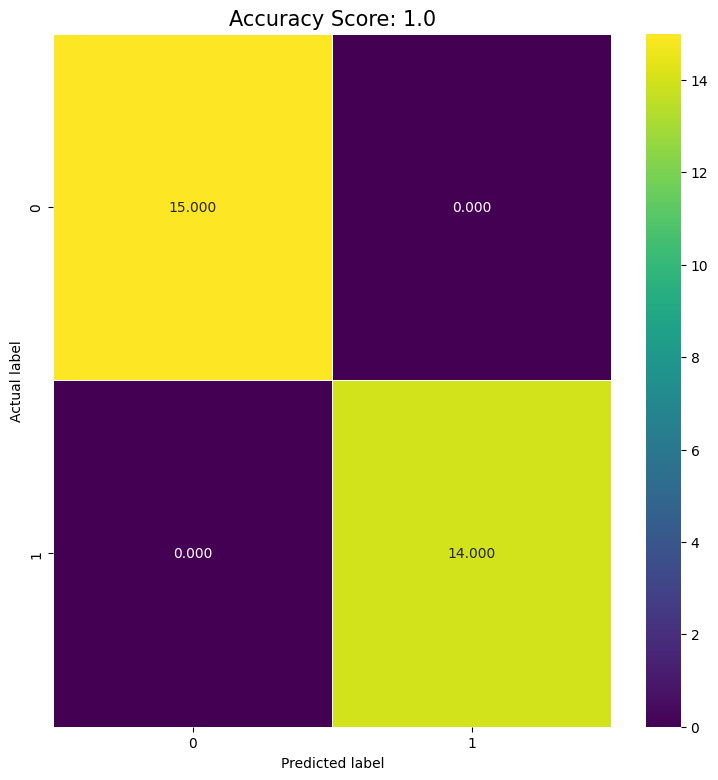

In [61]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = False, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [62]:
xnew = np.array([[0, 0, 0, 0, 6, 0, 2, 0 ,0,
                 0, 0, 0, 0, 6, 0, 2, 0, 0]])

#total_row_score(xnew)


logisticRegr.predict_proba(xnew.reshape(1,18))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.31127927, 0.68872073]])

In [63]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
            
predi = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, predi))
            
clf.score(X_test, y_test)

[[15  0]
 [ 0 14]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0